In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pystan
import scipy.stats as stats

import scipy.stats as stats

In [2]:
# observed data
df = pd.read_csv('data/HtWt.csv')
df.head()

,male,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


In [3]:
log_reg_code = """
data {
    int<lower=0> n;
    int male[n];
    real weight[n];
    real height[n];
}
transformed data {}
parameters {
    real a;
    real b;
    real c;
}
transformed parameters {}
model {
    a ~ normal(0, 10);
    b ~ normal(0, 10);
    c ~ normal(0, 10);
    for(i in 1:n) {
        male[i] ~ bernoulli(inv_logit(a*weight[i] + b*height[i] + c));
  }
}
generated quantities {}
"""

log_reg_dat = {
             'n': len(df),
             'male': df.male,
             'height': df.height,
             'weight': df.weight
            }

fit = pystan.stan(model_code=log_reg_code, data=log_reg_dat, iter=2000, chains=1)

In [5]:
print(fit)

Inference for Stan model: anon_model_1d884862dfc8cc07454a0c3bd709994b.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a    9.5e-3  7.5e-4 9.6e-3  -0.01 2.9e-3 9.5e-3   0.02   0.03    167    1.0
b      0.38  7.1e-3   0.09   0.24   0.32   0.38   0.44   0.55    145    1.0
c    -26.83    0.43    5.3 -38.08  -30.5 -26.73 -22.78  -17.2    152    1.0
lp__ -35.24     0.1   1.15 -38.28 -35.72 -34.96 -34.41 -33.88    139    1.0

Samples were drawn using NUTS(diag_e) at Tue Oct  6 09:11:08 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


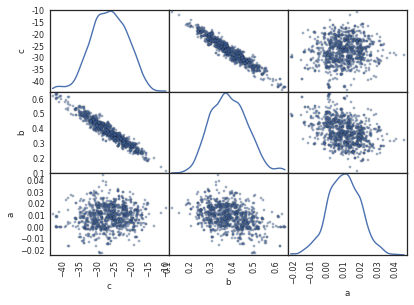

In [6]:
df_trace = pd.DataFrame(fit.extract(['c', 'b', 'a']))
pd.scatter_matrix(df_trace[:], diagonal='kde');